### Solving First Order Differential Equation

### Content
    - Python function to approximate y(n) using Euler method
    - Python function to approximate y(n) using Runge-kutta method of order 4
    - Examples with Visualizations
        - Comparison of performances of Euler method with different step sizes (for two examples)
        - Comparison between the performances of Euler and Runge-Kutta(order 4) (for two examples)

### Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Euler method to approximate $y_n$

In [2]:
def Euler(f,y0,t):
     
    n = len(t)
    y = np.zeros(len(t))
    y[0] = y0     # Initial Value
    
    for i in range(0,n-1):
        y[i+1] = y[i] + f(y[i],t[i])*(t[i+1] - t[i])
        
    return y

### Runge-Kutta method (of order 4) to approximate $y_n$

In [3]:
## 4th order Runge-Kutta method
def rk4(f, y0, t, args=()):
    
    n = len(t)
    y = np.zeros((n, len([y0])))
    y[0] = y0     # Initial Value
    
    for i in range(n - 1):
        h = t[i+1] - t[i]
        k1 = f(y[i], t[i], *args)
        k2 = f(y[i] + k1 * h / 2., t[i] + h / 2., *args)
        k3 = f(y[i] + k2 * h / 2., t[i] + h / 2., *args)
        k4 = f(y[i] + k3 * h, t[i] + h, *args)
        y[i+1] = y[i] + (h / 6.) * (k1 + 2*k2 + 2*k3 + k4)
        
    return y

## Example 1 

**Here the target is to solve the following - 
${dy \over dt} = y , y_0= 1$**


Here we know the solution is $y = e^t$. It allows us to easily verify the performance of the Euler Method with different step sizes.

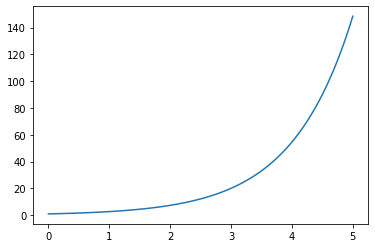

In [4]:
t = np.linspace(0, 5, 1000)
y_true = [np.exp(x) for x in t]
plt.plot(t, y_true)
legend = ['True']
plt.show()

## Euler's method for different Step Sizes

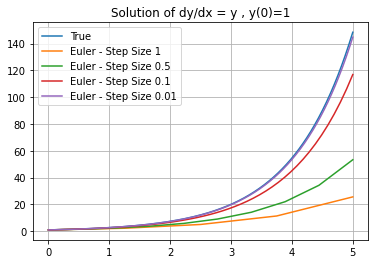

In [5]:
def f(y, t):
    return y

t_min, t_max = (0, 5) # Define Range
y0 = 1 # Initial Value

## Plot the true values 
t = np.linspace(t_min, t_max, 1000)
y_true = np.exp(t)
plt.plot(t, y_true)
legend = ['True']

# Run Euler for different step sizes
step_sizes = [1, 0.5, 0.1, 0.01]

for step_size in step_sizes:
    
    n_steps = int((t_max - t_min) / step_size)
    t = np.linspace(t_min, t_max, n_steps, endpoint= True)
    
    y = Euler(f,y0,t)
    plt.plot(t, y)
    legend.append("Euler - Step Size {}".format(step_size))
    
plt.legend(legend)
plt.grid(True)
plt.title("Solution of dy/dx = y , y(0)=1")
plt.show()

### Euler Method vs 4th Order Runge-Kutta Method

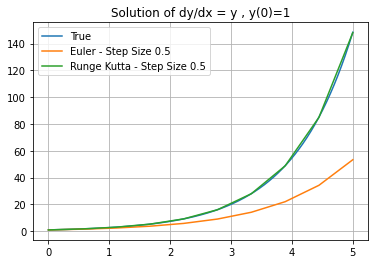

In [6]:
t_min, t_max = (0, 5) # Define Range
y0 = 1 # Initial Value

## Plot the true values 
t = np.linspace(t_min, t_max, 1000)
y_true = np.exp(t)
plt.plot(t, y_true)
legend = ['True']

## Now we run Euler and Runge-Kutta of fourth order with step size 0.5
step_size = 0.5
n_steps = int((t_max - t_min) / step_size)
t = np.linspace(t_min, t_max, n_steps, endpoint= True)
y = Euler(f,y0,t)
plt.plot(t, y)
legend.append("Euler - Step Size {}".format(step_size))

y = rk4(f,y0,t)
plt.plot(t, y)
legend.append("Runge Kutta - Step Size {}".format(step_size))
    
plt.legend(legend)
plt.grid(True)
plt.title("Solution of dy/dx = y , y(0)=1")
plt.show()

Even with step size of 0.5, the fourth order Runge-Kutta method approximates the target.

### Example 2

**Here we will solve the following first order differential equation -  
${dy \over dt }+ ty = 0, y_{-3}= 0.0044318 $**

The true function looks like the pdf of the standard normal distribution. Though we should not look this function as a pdf. Here, we will find values at discrete points and the probability of continuous random variable at a given point is 0.

In [7]:
def normal_dist_fn(x, mu = 0, sigma = 1):
    
    f_x = (1/(sigma*np.sqrt(2*np.pi))* np.exp(-0.5*((x- mu)/sigma)**2))
    return f_x

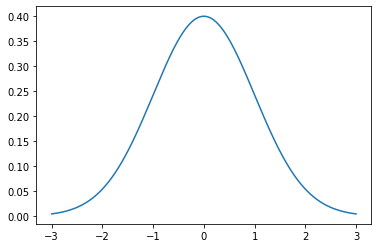

In [8]:
t = np.linspace(-3, 3, 1000)

y_true = [normal_dist_fn(x) for x in t]
plt.plot(t, y_true)
legend = ['True']
plt.show()

### Euler Method vs 4th Order Runge-Kutta Method

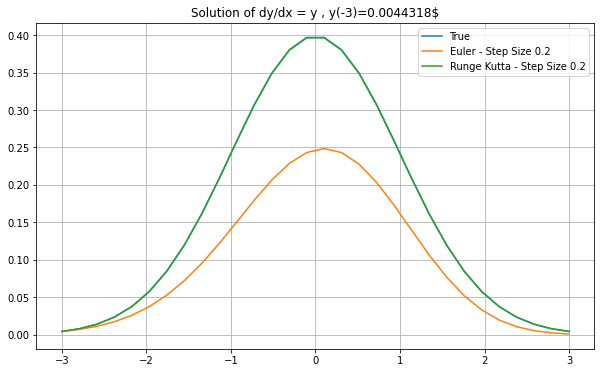

In [9]:
# Euler vs RK4
def f(y, t):
    
    return -t*y

y0 = normal_dist_fn(-3) #it's given
step_size = 0.2
t_min, t_max = (-3, 3)
n_steps = int((t_max - t_min) / step_size)
t = np.linspace(t_min, t_max, n_steps)

y_true = [normal_dist_fn(x) for x in t]
plt.figure(figsize=(10,6))
plt.plot(t, y_true)
legend = ['True']

t = np.linspace(t_min, t_max, n_steps, endpoint= True)

y = Euler(f,y0,t)
plt.plot(t, y)
legend.append("Euler - Step Size {}".format(step_size))

y = rk4(f,y0,t)
plt.plot(t, y)
legend.append("Runge Kutta - Step Size {}".format(step_size))

plt.legend(legend)
plt.grid(True)
plt.title("Solution of dy/dx = y , y(-3)=0.0044318$")
plt.show()